Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load the Dataset

In [33]:
df = pd.read_csv("/content/sample_data/diabetes_200_rows (2).csv")
df.head()

,PatientID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,1,6,166,106,30,97,42.8,76,0.72,1
1,2,3,193,104,57,56,32.5,64,0.56,0
2,3,7,139,72,15,115,34.8,67,0.30,1
3,4,4,162,79,37,20,32.1,77,0.88,1
4,5,6,72,113,26,194,30.8,30,1.44,1


Explore the Data

In [34]:
print(df.isnull().sum())


PatientID                   0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Age                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64


In [35]:
print(df.describe())

        PatientID  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  200.000000   200.000000  200.000000     200.000000     200.000000   
mean   100.500000     4.560000  137.520000      77.915000      34.195000   
std     57.879185     2.899731   39.291458      22.535907      14.702988   
min      1.000000     0.000000   70.000000      40.000000      10.000000   
25%     50.750000     2.000000  102.750000      58.000000      22.750000   
50%    100.500000     5.000000  136.000000      76.000000      34.000000   
75%    150.250000     7.000000  170.000000      97.000000      47.000000   
max    200.000000     9.000000  199.000000     119.000000      59.000000   

          Insulin         BMI         Age  DiabetesPedigreeFunction  \
count  200.000000  200.000000  200.000000                 200.00000   
mean   138.795000   33.650500   51.170000                   1.31915   
std     73.233453    9.374321   17.784898                   0.69169   
min     15.000000   18.400000  

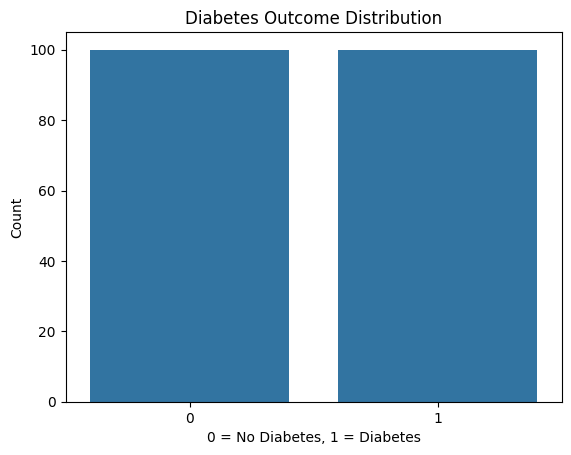

In [36]:
sns.countplot(data=df, x='Outcome')
plt.title('Diabetes Outcome Distribution')
plt.xlabel('0 = No Diabetes, 1 = Diabetes')
plt.ylabel('Count')
plt.show()

Split Features and Labels

In [37]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Normalize the Features

KNN is distance-based, so normalization is essential.

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split into Training and Testing Sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Train the KNN Classifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Make Predictions

In [41]:
y_pred = knn.predict(X_test)

Evaluate the Model

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52


In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        30
           1       0.52      0.43      0.47        30

    accuracy                           0.52        60
   macro avg       0.52      0.52      0.51        60
weighted avg       0.52      0.52      0.51        60



In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18 12]
 [17 13]]


Visualize Confusion Matrix

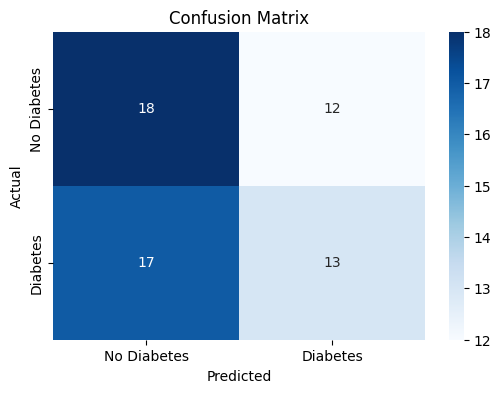

In [45]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()